# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` and `resnet.py` files.

# Env setup
You can either create your own environment and install the packages manually, or use the following commands to create a conda environment with the required packages. Before running the commands, edit the two .yml file prefixes to match the path to your miniconda path. Setting up an environment is always tricky. You will most likely run into errors. Don't feel bad looking up the errors on Google and asking for assistance after trying to resolve the issue.
</br>
</br>
If you are using Windows and running into errors, try omitting the word 'env' from the following commands. Mileage may vary with other OS's, so it may take a bit of debugging.
</br>
</br>
Below, I provide two methods of setting up your environment: `Env Environment Based on My Yaml Files` and `Alternative Method - Custom Built Environment`. Try to use the first method, but if you run into issues, try the second method. **** You do not need to run both methods!!! **** Just get one of them working.


# Env Environment Based on My Yaml Files:

## BIE Environment:

In [1]:
! conda create --name BIE_conversion
! conda activate BIE_conversion
! conda env update --name BIE_conversion --file ./conda_envs/BIE_conversion.yml

Remove existing environment (y/[n])? 

## Keras GPU Environment:

In [ ]:
! conda create --name keras_gpu
! conda activate keras_gpu
! conda env update --name keras_gpu --file ./conda_envs/keras_gpu.yml

# Alternative Method - Custom Built Environment:
If the previous methods didn't work, try this method. It will create a gpu environment with the necessary libraries:

In [ ]:
# Installations for alternative method
! conda create --name keras_gpu keras-gpu tensorflow-gpu
! conda activate keras_gpu
! conda install -c anaconda pandas=1.4.1
! conda install -c anaconda matplotlib=3.5.1
! conda install -c anaconda numpy=1.18.5
! conda install -c anaconda bitstring=3.1.9
! conda install -c anaconda joblib=1.1.0
! conda install -c anaconda pillow=8.2.0

## Env Setup Conclusion
There is a high likelihood that you will run into errors. If you do, don't feel bad. It's a learning experience. If you are still having issues, feel free to reach out to me for assistance. Try modifying the files as necessary and looking up the errors on Google. This process will likely take some time and be the hardest part of using this notebook.

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'Species'
df = add_id_column(df, classification_id)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here!
# For example, if you have missing values, you can fill them in with the mean value of the column or drop them
# Look at our past work for examples of how to do this
# Kaggle is another good resource

In [8]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [11]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0]


In [10]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 150 samples to binary: 2.2125086784362793 seconds. Seconds per sample = 0.014750057856241863


## Place Folders into the Correct Categories

In [11]:
organize_photos_in_folders(image_directory, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [ ]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-04-11 12:59:43.065349: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [ ]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

: 

In [9]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.006600152849568985, 'acc': 0.9983333349227905, 'f1_m': 0.9979166626930237, 'precision_m': 0.9979166626930237, 'recall_m': 0.9979166626930237, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003653079250943847, 'mean_squared_error': 0.00092650216973027, 'val_loss': 0.37048304416239264, 'val_acc': 0.9066666603088379, 'val_f1_m': 0.9066666245460511, 'val_precision_m': 0.9066666603088379, 'val_recall_m': 0.9066666603088379, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.06671324791386724, 'val_mean_squared_error': 0.055582360707921906, 'lr': 0.002205399941021824}


In [10]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.006023820023983717, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003057684050872922, 'mean_squared_error': 0.0012675473699346185, 'val_loss': 0.007461799308657646, 'val_acc': 1.0, 'val_f1_m': 1.0, 'val_precision_m': 1.0, 'val_recall_m': 1.0, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.00479428144171834, 'val_mean_squared_error': 0.0002938260731752962, 'lr': 0.00049999997}


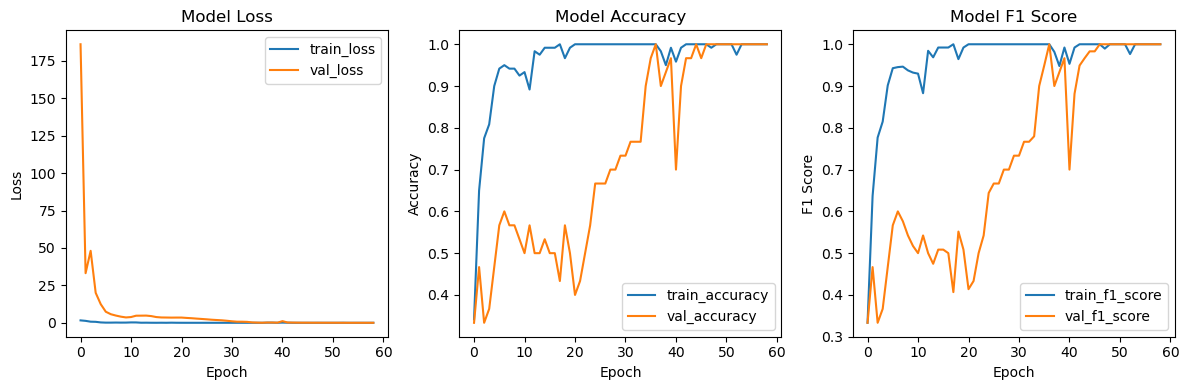

In [11]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [ ]:
#FIXME - update the directories to point where you would like
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [12]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
correlated_df = df.reindex(columns=correlated_order)

In [14]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


In [15]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [16]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [17]:
organize_photos_in_folders(image_directory, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [ ]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.0021178958297241477, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 1.0, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.0013242868444649503, 'mean_squared_error': 0.00014281665536941546, 'val_loss': 0.3948760949075222, 'val_acc': 0.9199999928474426, 'val_f1_m': 0.9166101098060608, 'val_precision_m': 0.9199999928474426, 'val_recall_m': 0.9133333206176758, 'val_auc': 0.9108332991600037, 'val_false_negatives': 5.0, 'val_false_positives': 5.0, 'val_true_negatives': 55.0, 'val_true_positives': 25.0, 'val_mean_absolute_error': 0.06487068757414818, 'val_mean_squared_error': 0.051262075267732146, 'lr': 0.0023049999341310467}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.000651675509288907, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_4': 1.0, 'false_negatives_4': 0.0, 'false_positives_4': 0.0, 'true_negatives_4': 240.0, 'true_positives_4': 120.0, 'mean_absolute_error': 0.0004321309388615191, 'mean_squared_error': 3.8298953768389765e-06, 'val_loss': 0.05403872951865196, 'val_acc': 1.0, 'val_f1_m': 0.9830508232116699, 'val_precision_m': 1.0, 'val_recall_m': 0.9666666388511658, 'val_auc_4': 1.0, 'val_false_negatives_4': 1.0, 'val_false_positives_4': 0.0, 'val_true_negatives_4': 60.0, 'val_true_positives_4': 29.0, 'val_mean_absolute_error': 0.02872484177350998, 'val_mean_squared_error': 0.009663733653724194, 'lr': 0.01}


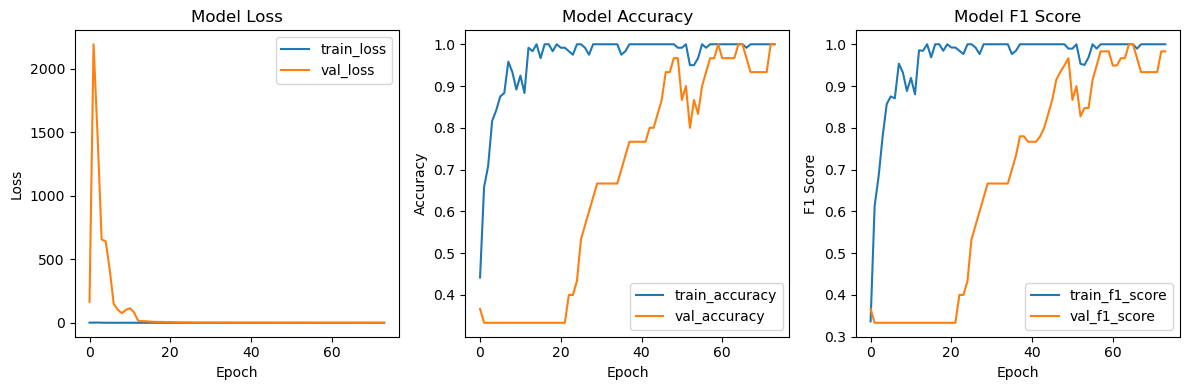

In [7]:
plot_metrics(best_model.history)

# IGTD

In [9]:
from IGTD_Functions import min_max_transform, table_to_image, generate_feature_distance_ranking,generate_matrix_distance_ranking,IGTD,run

In [3]:
save_image_size = 3 # Size of ranking pictures
max_step = 100000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'squared'
result_dir = '/mnt/sda1/image-results-iris-IGTD-test'

In [11]:
def normalize_data(data):
    norm_data = min_max_transform(data.values)
    norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)
    return norm_data

In [12]:
# replace index values with the column id
df = df.set_index('Id')

In [13]:
normalized_data = normalize_data(df.drop([classification_id], axis=1))

In [14]:
import numpy as np
zero_cols = pd.DataFrame(0, index=normalized_data.index, columns=['zero0', 'zero1', 'zero2', 'zero3', 'zero4'])
normalized_data = pd.concat([normalized_data, zero_cols], axis=1)
normalized_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,
1-setosa,0.222222,0.625000,0.067797,0.041667,0,0,0,0,0
2-setosa,0.166667,0.416667,0.067797,0.041667,0,0,0,0,0
3-setosa,0.111111,0.500000,0.050847,0.041667,0,0,0,0,0
4-setosa,0.083333,0.458333,0.084746,0.041667,0,0,0,0,0
5-setosa,0.194444,0.666667,0.067797,0.041667,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
46-virginica,0.666667,0.416667,0.711864,0.916667,0,0,0,0,0
47-virginica,0.555556,0.208333,0.677966,0.750000,0,0,0,0,0
48-virginica,0.611111,0.416667,0.711864,0.791667,0,0,0,0,0


In [15]:
scale,coordinate,normDir,min_id,index = table_to_image(normalized_data, [3, 3], fea_dist_method, image_dist_method, save_image_size,
            max_step, val_step, result_dir, error)

Step 0 err: 4365.5
Step 1 err: 4365.5
Step 2 err: 3981.5
Step 3 err: 3981.5
Step 4 err: 3981.5
Step 5 err: 3981.5
Step 6 err: 3981.5
Step 7 err: 3981.5
Step 8 err: 3981.5
Step 9 err: 3981.5
Step 10 err: 3981.5
Step 11 err: 3981.5
Step 12 err: 3981.5
Step 13 err: 3981.5
Step 14 err: 3981.5
Step 15 err: 3981.5
Step 16 err: 3981.5
Step 17 err: 3981.5
Step 18 err: 3981.5
Step 19 err: 3981.5
Step 20 err: 3981.5
Step 21 err: 3981.5
Step 22 err: 3981.5
Step 23 err: 3981.5
Step 24 err: 3981.5
Step 25 err: 3981.5
Step 26 err: 3981.5
Step 27 err: 3981.5
Step 28 err: 3981.5
Step 29 err: 3981.5
Step 30 err: 3981.5
Step 31 err: 3981.5
Step 32 err: 3981.5
Step 33 err: 3981.5
Step 34 err: 3981.5
Step 35 err: 3981.5
Step 36 err: 3981.5
Step 37 err: 3981.5
Step 38 err: 3981.5
Step 39 err: 3981.5
Step 40 err: 3981.5
Step 41 err: 3981.5
Step 42 err: 3981.5
Step 43 err: 3981.5
Step 44 err: 3981.5
Step 45 err: 3981.5
Step 46 err: 3981.5
Step 47 err: 3981.5
Step 48 err: 3981.5
Step 49 err: 3981.5
Step 50 er

In [16]:
normalized_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,
1-setosa,0.222222,0.625000,0.067797,0.041667,0,0,0,0,0
2-setosa,0.166667,0.416667,0.067797,0.041667,0,0,0,0,0
3-setosa,0.111111,0.500000,0.050847,0.041667,0,0,0,0,0
4-setosa,0.083333,0.458333,0.084746,0.041667,0,0,0,0,0
5-setosa,0.194444,0.666667,0.067797,0.041667,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
46-virginica,0.666667,0.416667,0.711864,0.916667,0,0,0,0,0
47-virginica,0.555556,0.208333,0.677966,0.750000,0,0,0,0,0
48-virginica,0.611111,0.416667,0.711864,0.791667,0,0,0,0,0


In [17]:
run(normalized_data, index, min_id, scale, coordinate,normDir)

In [19]:
organize_photos_in_folders(result_dir, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [22]:
new_dir

'/mnt/sda1/image-results-iris-IGTD-test/data'

In [4]:
new_dir = result_dir + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{result_dir}/results/", num_folds, batch_size, small_dataset=True)

2023-04-11 13:00:07.307245: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-11 13:00:07.308092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-11 13:00:07.340418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 13:00:07.340733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-04-11 13:00:07.340751: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-11 13:00:07.376363: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-04-11 13:00:09.746303: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-04-11 13:00:09.746327: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-04-11 13:00:09.747363: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-04-11 13:00:09.754668: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-04-11 13:00:09.826273: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-04-11 13:00:09.826383: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-04-11 13:00:09.930884: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-11 13:00:09.951596: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-04-11 13:00:13.723173: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-11 13:00:14.052819: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-11 13:00:15.120979: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-04-11 13:00:15.158639: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2/4 [==============>...............] - ETA: 0s - loss: 1.7108 - acc: 0.3125 - f1_m: 0.2338 - precision_m: 0.2972 - recall_m: 0.1953 - auc: 0.4132 - false_negatives: 38.5000 - false_positives: 24.0000 - true_negatives: 72.0000 - true_positives: 9.5000 - mean_absolute_error: 0.4777 - mean_squared_error: 0.3094  

2023-04-11 13:00:41.789717: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-04-11 13:00:41.789745: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


3/4 [=====================>........] - ETA: 0s - loss: 1.5886 - acc: 0.3611 - f1_m: 0.2950 - precision_m: 0.3520 - recall_m: 0.2587 - auc: 0.4769 - false_negatives: 45.3333 - false_positives: 29.3333 - true_negatives: 98.6667 - true_positives: 18.6667 - mean_absolute_error: 0.4525 - mean_squared_error: 0.2897

2023-04-11 13:00:41.849522: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-04-11 13:00:41.851287: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-04-11 13:00:41.861300: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-04-11 13:00:41.888595: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-04-11 13:00:41.921604: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-IGTD-test/results/tb_logs/train/plugins/profile/2023_04_11_13_00_41
2023-04-11 13:00:41.944158: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-IGTD-test/results/tb_logs/train/plugins/profile/2023_04_11_13_00_41/drake-pc.trace.json.gz
2023-04-11 13:00:41.99905

4/4 [==============================] - ETA: 0s - loss: 1.4990 - acc: 0.4021 - f1_m: 0.3511 - precision_m: 0.4045 - recall_m: 0.3158 - auc: 0.5269 - false_negatives: 50.0000 - false_positives: 32.7500 - true_negatives: 123.2500 - true_positives: 28.0000 - mean_absolute_error: 0.4302 - mean_squared_error: 0.2731

In [18]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.11064508557319641, 'acc': 0.95333331823349, 'f1_m': 0.9519285917282104, 'precision_m': 0.9567667722702027, 'recall_m': 0.9473958253860474, 'auc_12': 0.9973089694976807, 'false_negatives_12': 6.0, 'false_positives_12': 6.0, 'true_negatives_12': 234.0, 'true_positives_12': 114.0, 'mean_absolute_error': 0.050237862020730974, 'mean_squared_error': 0.022630949318408967, 'val_loss': 1086.8984822109342, 'val_acc': 0.6200000047683716, 'val_f1_m': 0.6161581397056579, 'val_precision_m': 0.6190804600715637, 'val_recall_m': 0.6133333325386048, 'val_auc_12': 0.9288889169692993, 'val_false_negatives_12': 5.0, 'val_false_positives_12': 4.0, 'val_true_negatives_12': 56.0, 'val_true_positives_12': 25.0, 'val_mean_absolute_error': 0.26090467274188994, 'val_mean_squared_error': 0.23688815608620645, 'lr': 1.9999999949504854e-06}


In [19]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.105766162276268, 'acc': 0.9666666388511658, 'f1_m': 0.9504781365394592, 'precision_m': 0.9619252681732178, 'recall_m': 0.9401041865348816, 'auc_15': 0.9967013001441956, 'false_negatives_15': 7.0, 'false_positives_15': 4.0, 'true_negatives_15': 236.0, 'true_positives_15': 113.0, 'mean_absolute_error': 0.043902646750211716, 'mean_squared_error': 0.022291149944067, 'val_loss': 0.12082067877054214, 'val_acc': 0.9333333373069763, 'val_f1_m': 0.9333332777023315, 'val_precision_m': 0.9333333373069763, 'val_recall_m': 0.9333333373069763, 'val_auc_15': 0.9955555200576782, 'val_false_negatives_15': 2.0, 'val_false_positives_15': 2.0, 'val_true_negatives_15': 58.0, 'val_true_positives_15': 28.0, 'val_mean_absolute_error': 0.0508333295583725, 'val_mean_squared_error': 0.026489850133657455, 'lr': 2e-06}


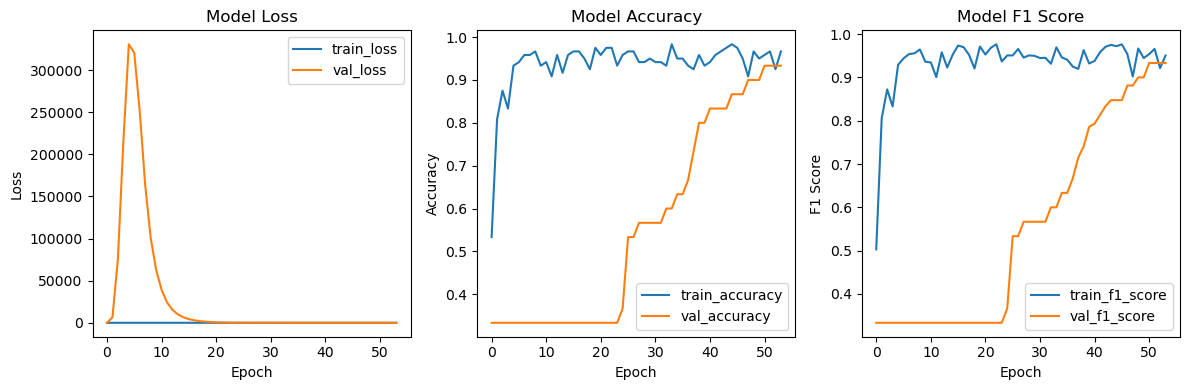

In [20]:
plot_metrics(best_model.history)